## Beschreibung des Datensatz und der Erhebung:
#### Erhebung durch: Marc-Antoine Brülhart - marcantoine.bruelhart@gmail.com

#### Wie wurden die Daten erhoben: 
Für die Datenerhebung wurde ein Raspberry PI Modell 3 und ein MPU-6050 Sensor verwendet.
Das Setup wurde mit der Anleitung: https://tutorials-raspberrypi.com/measuring-rotation-and-acceleration-raspberry-pi/ erstellt. Nachfolgend eine kurze Beschreibung des Setups:

1. Raspberry PI Raspbian Setup
2. Config der I2C Schnittstelle auf dem Raspberry Pi
3. Python Scripts erstellen um MPU-6050 Modul anzusprechen
4. Python Script für das Sammeln der Daten erstellen

Die Daten wurden von der Waschmaschiene "Schulthess Spirit topLine 8010" erhoben. Der MPU-6050 Sensor wurde mit Klebeband an die Waschmaschiene befestigt, sodass er sich nicht mehr frei bewegen kann.
Zustand gebraucht, hat einige Jahre auf dem Bukel.

#### Wann wurden die Daten erhoben: 
Die Daten wurden am 2018-10-16 um 17.35 erhoben.
#### Wie viele Datenpunkte wurden erfasst:  
23783 x,y und z Koordinaten sowie 1 header zeile mit den Beschriftungen x,y,z
#### Wurden Attribute präprozessiert:
Ja, die Daten wurden mit dem Scale Factor 2G präprozessiert. Mit dem Scale Factor, kann man die erfassten Daten linear skalieren. Der Faktor wird vom Hersteller des Sensor festgelegt und ist im Datenblatt unter: https://www.invensense.com/wp-content/uploads/2015/02/MPU-6000-Datasheet1.pdf festgehalten.

Datenblatt Version: 
Document Number: PS, MPU, 6000A,00
Revision: 3.4
Release Date: 
08/19/2013

#### Wurden die Daten gefiltert? 
Nein  

#### Plot der erhobenen Daten:

<Figure size 432x288 with 0 Axes>

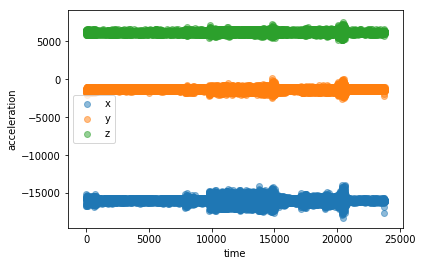

In [10]:
import storyfunctions as sf
import pandas as pd

df = pd.read_csv("2018-12-03-0.wd")
sf.plot_raw(df)

## Qualitative Beschreibung der Variablen
#### Was für Dimensionen / Masseinheiten haben die Variablen:
Die Daten wurden in 3 Dimension erhoben. Die Beschleunigung wurde in den Dimensionen: x,y,z Achse, mit der zusätzlichen Dimension Zeit.

#### Welche Merkmale, Variablen, Attribute wurden erfasst:
Datenpunkte von -16383 bis +16383. Für die weiteren Beschreibungen wurden die Länge der Vektoren berechnet. Alle weiteren Schritte basieren auf diese Länge.

#### Von was für einem Variablentyp sind die Variablen:
Skalentyp: Ordinale Variablen. 




## Quantitative Beschreibung der Variablen
Für die Quantitative Beschreibung der Variablen, 
#### Lage
Das Zentrum der Daten befindet sich beim Punkt 17202 (average). Ein grosser Teil der Punkte liegt um diesen Punkt +/- 309 (Standardabweichung). Stark abweichende Datenpunkte haben einen geringen Effekt auf das Zentrum, da eine grosse Menge der Punkte im Zentrum selbst liegt. 

#### Streuung:
Das Maximum befindet sich beim Punkt 18688 und das Minimum bei Punkt 15552. 
Die Standardabweichung ist 309.

## Plot der Länge des Vektors mit den Quantitativen Beschreibungen der Variablen.
Im Nachfolgendem Plot sind verschiedene States der Waschmaschiene erkennbar. Es könnten 

max:  18688.5192565
min:  15552.5046214
median:  17202.3640236
average:  17199.918792
std:  309.9422421


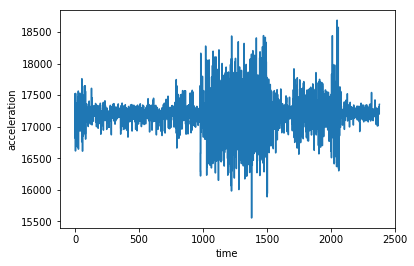

In [8]:
sf.plot_vector(df)

#### Zusammenhang von Variablen
Mögliche States die aus dem obigen Plot interpretiert werden könnten.
- 0   - 100: die Waschmaschiene verteilt das Waschmittel und füllt die Trommel mit Wasser.
- 100 - 1000: das Waschmittel wirk ein
- 1000 - 1500: die Waschmaschiene beginnt die Trommel zu drehen um die Wäsche zu waschen.
- 1500 - 1700: das Wasser der Waschmaschiene wird abgepumpt
- 1700 - 2000: frisches Wasser wird in die Waschmaschiene gepumpt und ein Spülgang wird eigesetzt. 
- 2000 - 2100: der Schleudergang setzt ein, der das Wasser aus der Wäsche prügelt. 
- 2100 - 2500: die Wäsche wird mit leichten Umdrehungen der Trommel ausgewindet. 

## Plot mit der Maskierung der Werte die innerhalb der Standardabweichung  vorkommen
Nachfolend wurden Werte aus dem obigen Plot maskiert. Alle Werte die innerhalb des Durschnittwertes (average) + / - der Standardabweichung vorkommen wurden maskiert. Es resultiert orange alle Werte die über diese Grenze sind. Daraus könnte interpretiert werden, dass die Maschiene während dem das Waschmittel einwirkt, das Wasser aus der Waschmaschiene abgepumpt wird und die Wäsche ausgwindet wird, nicht in Betrieb ist. 

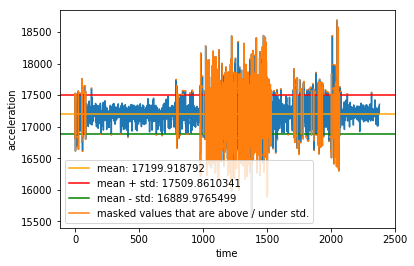

In [11]:
sf.plot_masked(df)

## Fazit
Es ist Abschliessend nicht genau erkennbar, wann die Waschmaschiene im Betrieb ist und nicht. Mit dem letzten Plot, wurde versucht der Betrieb und die Stillstände während eines Waschgangs sichtbar zu machen. Da jedoch innerhalb des Waschgangs Zeitweise keine oder zu wenig Datenpunkte von der Standardabweichung Abweichen, könnte man daraus schliessen, dass die Maschiene während des Betriebs nicht am Waschen ist. Also augeschaltet. 

Für bessere und aussagenkräftigere Ergebnisse, würde es sich lohnen, die Datenpunkte mit einer Kalibrierungsphase erneutz zu erheben. Die Kalibrierungsphase würde vor und nach dem Waschgang sein, wenn die Waschtrommel nicht in Bewegung ist.